In [1]:
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

%matplotlib inline

# Matplotlib customizations.
# plt.style.use("seaborn")                      # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1

Examine the following data sets from pydataset and answer the corresponding questions. Use visualizations to support your conclusions.
- `"iris"`, measurements of various species of iris flowers.
    1. Which species is easiest to distinguish from the others? How?
    2. Given iris data without a species label, what strategies could you use to identify the flower’s species?

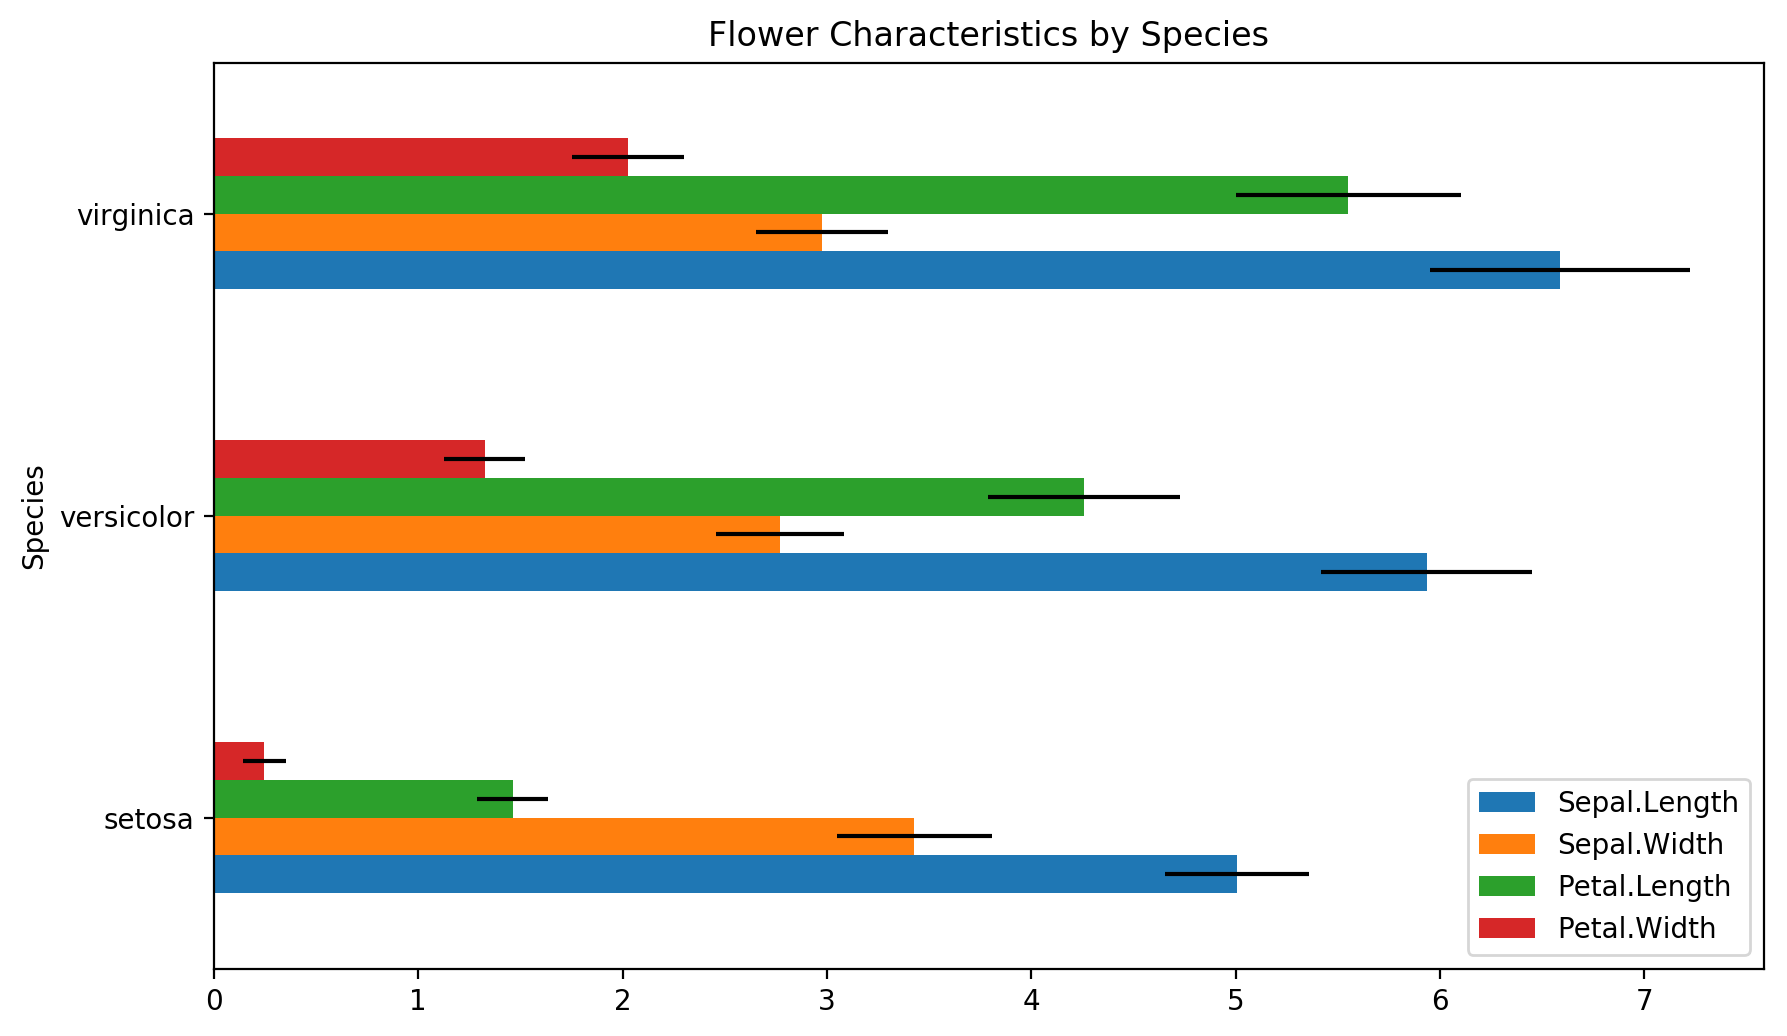

In [14]:
iris = data('iris')
species = iris.groupby('Species')
list(species.groups)
species.mean().plot(kind='barh',xerr=species.std(), title=r'Flower Characteristics by Species')
plt.show()

The easiest to identify would be the setosa, because its petals are so much smaller than the other species and has a relatively thicker sepal.
If I din't know the species, I would start by checking the petal size.  If it's width is less than a half inch, then I'd identify it as a setosa and move on.  Otherwise, if it's closer to an inch than two inches, then I'd say it's a versicolor.  Closer to two inches, I'd say it's a virginica.  If it relatively close to an inch and a half, I'd nex check petal length.  Less than five inches, versicolor, more than 5, virginica.  If it's relatively close to five inches, then there isn't much more to identify it than by sepal length, but it's not very clear cut there.

- `"poisons"`, experimental results of three different poisons and four different treatments.
    1. In general, which poison is most deadly? Which treatment is most effective?
    2. If you were poisoned, how would you choose the treatment if you did not know which poison it was? What if you did know which poison it was?
(Hint: group the data by poison, then group each subset by treatment.)

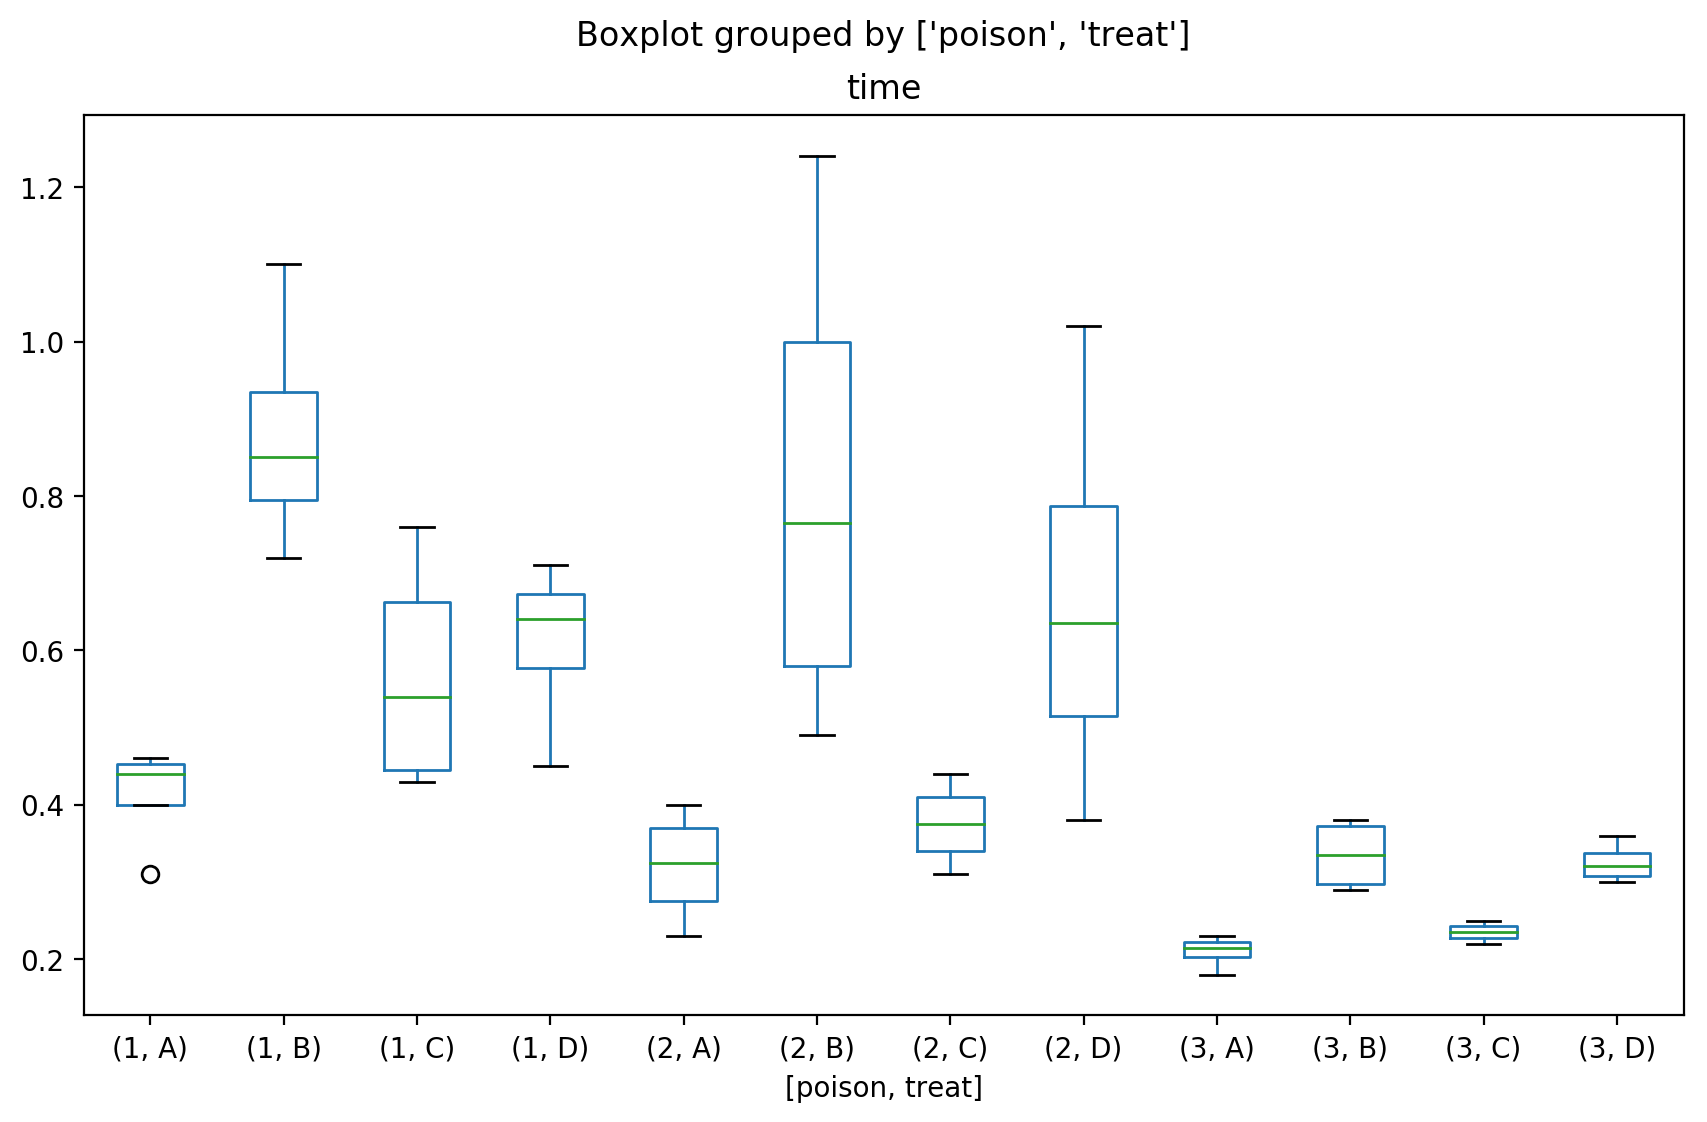

In [54]:
poison = data('poisons')#, show_doc=True)
poison.boxplot(['time'], by=['poison', 'treat'], grid=False)
plt.show()

The most deadly poison seems to be poison 3, as it has the smallest medians and maxes for each treatment.  The most effective treatment seems to be treatment B, though it's a stretch to call it a treatment if the animal still died from the poison afterwords.
If I didn't know what poison I had received, and assuming the substance was in fact poisonous to me, I think I wouldn't pick any of these treatments, unless it was a temporary treatment to get me to a more advanced medical facility, as they only seem to prolong suffering until death.  In any case, treatment B offers the greatest average buffer, with treatment D not too far behind.  However, if I was poisoned with poison 1, I'd definitely not want D.  Also, would these treatments be reusable?  How much of the treatment do I have, and how long will it take me to get to a better facility?  There are far too many other varaibles for me to determine how I would react if I had been foolish enough to get poisoned by one of these poisons.

- `"diamonds"`, prices and characteristics of almost 54,000 round-cut diamonds.
    1. How does the color and cut of a diamond affect its price?
    2. Of the diamonds with color `"H"`, those with a `"Fair"` cut sell, on average, for a higher price than those with an `"Ideal"` (superior) cut. What other factors could explain this unintuitive statistic?

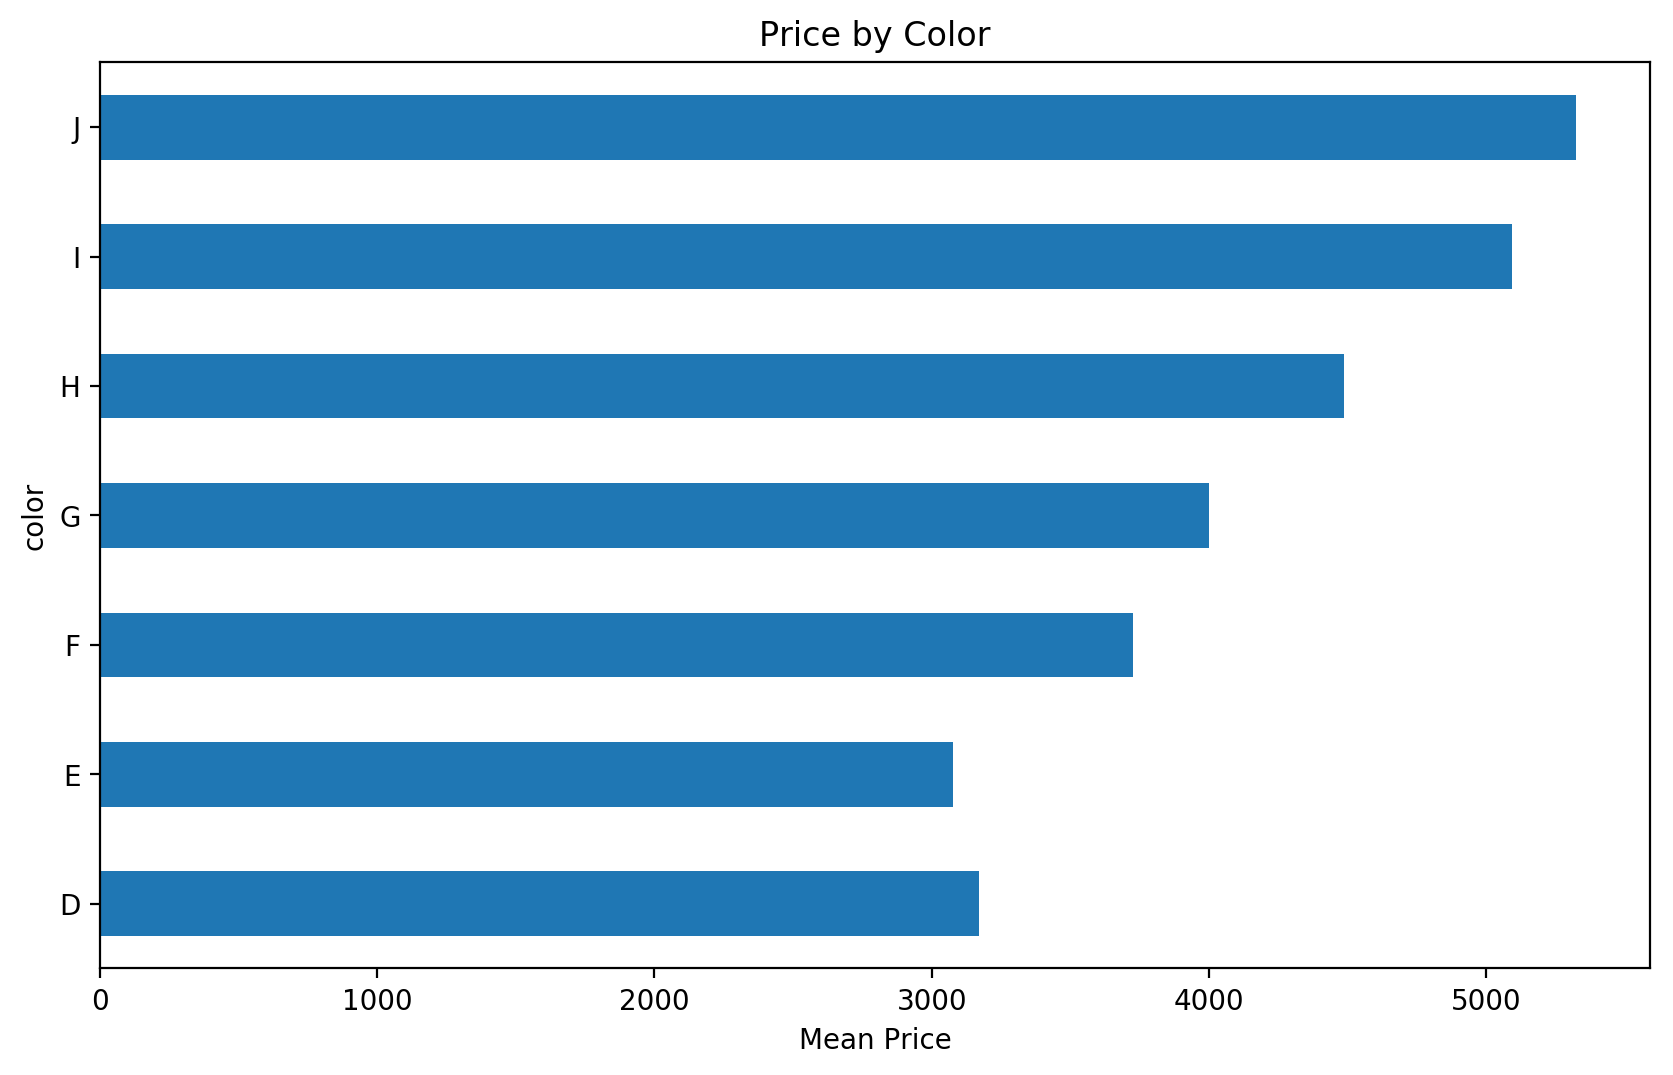

In [70]:
diamond = data('diamonds')
diam = diamond.groupby('color')
diam[['price']].mean().plot(kind='barh', title='Price by Color', legend=False)
plt.xlabel('Mean Price')
plt.show()

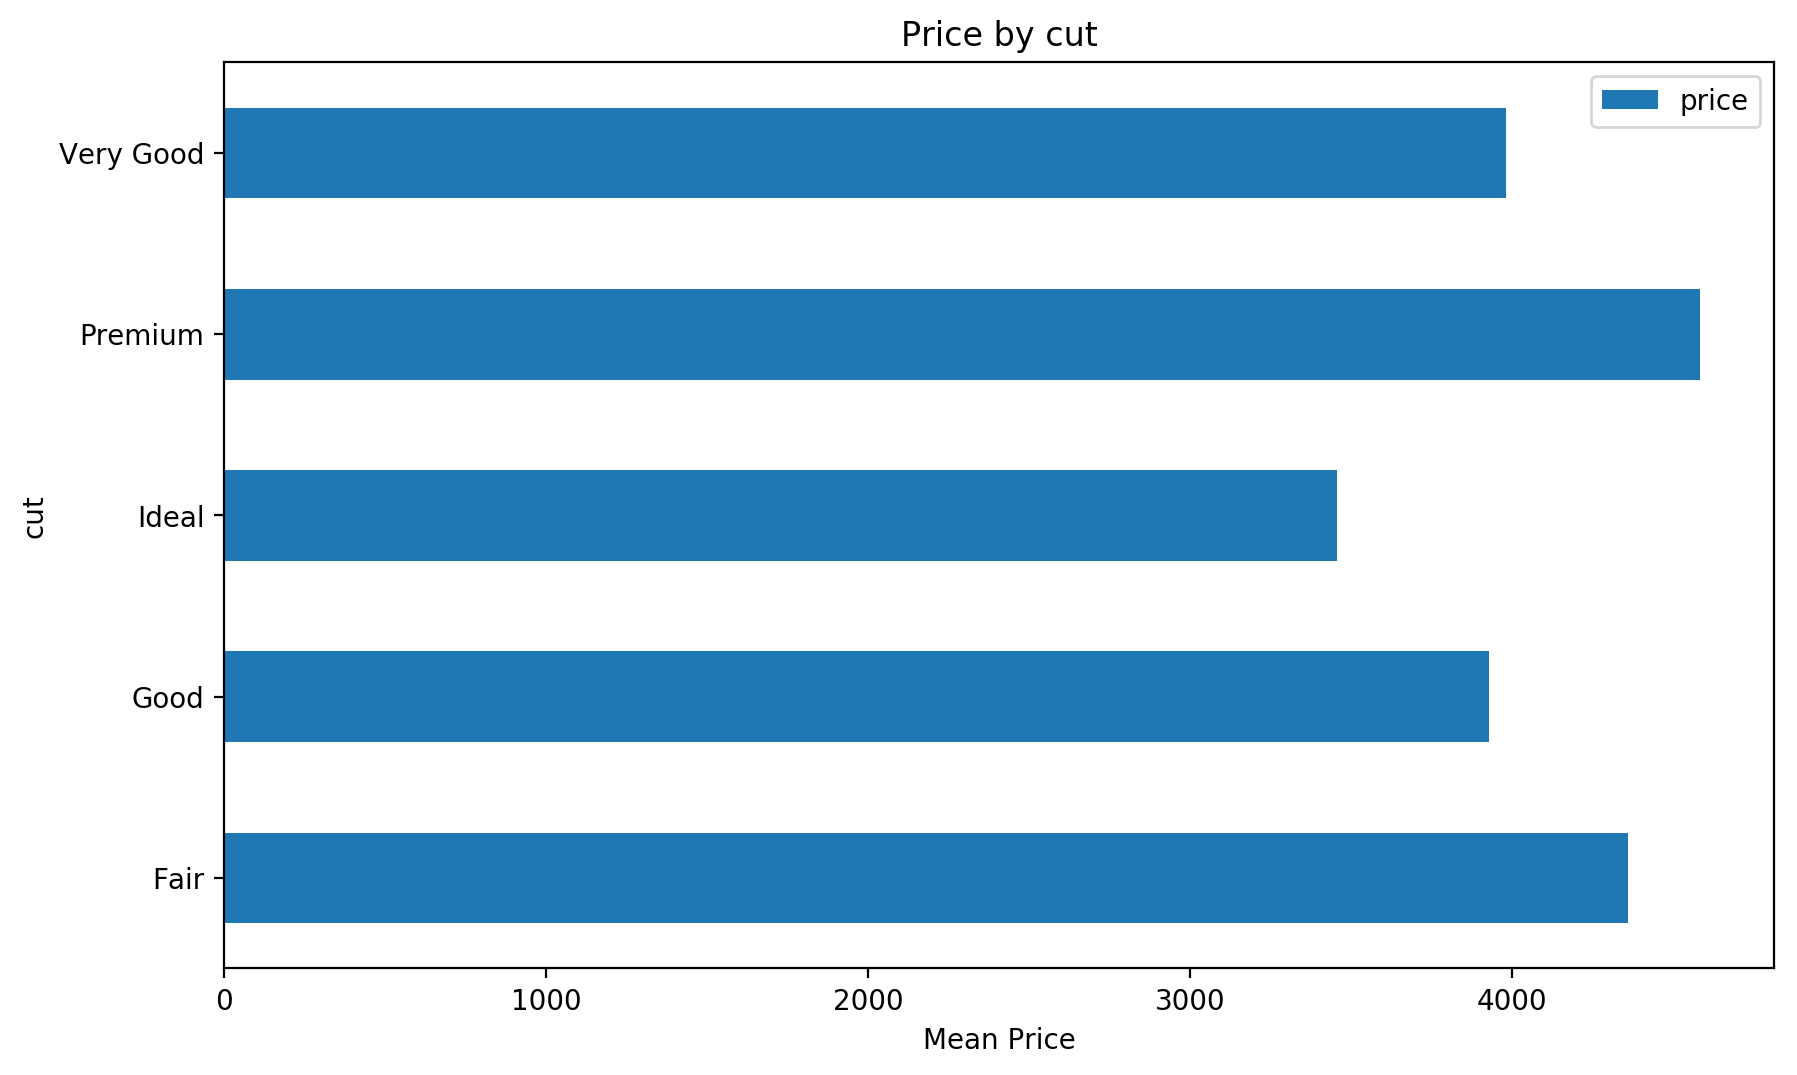

In [71]:
diams = diamond.groupby('cut')
diams[['price']].mean().plot(kind='barh', title='Price by cut')
plt.xlabel('Mean Price')
plt.show()

In general, it seems that color J diamonds are the most expensive, and that the average price is rather consistent with its color. At first, I'd want to say that the cut doesn't effect much.  However, when I think about how diamond sales would work, it would make sense that the fair and premium would cost the most, as those are the ones most people would be buying.

## Problem 2

Suppose that someone claims that the city from which a passenger embarked had a strong influence on the passenger’s survival rate. Investigate this claim.
1. Check the survival rates of the passengers based on where they embarked from (given in the `"Embarked"` column).
2. Create a pivot table to examine survival rates based on both place of embarkment and gender.
3. What do these tables suggest to you about the significance of where people embarked in influencing their survival rate? Examine the context of the problem, and explain what you think this really means.
4. Investigate the claim further with at least two more pivot tables, exploring other criteria (e.g., class, age, etc.). Carefully explain your conclusions.

In [89]:
# Note : C = Cherbourg ; Q = Queenstown ; S = Southampton
titanic = pd.read_csv("titanic.csv")
titanic.pivot_table(values="Survived", index="Embarked")

,Survived
Embarked,
C,0.556
Q,0.358
S,0.333


In [81]:
titanic.pivot_table(values="Survived", index=["Embarked"], columns=["Sex"])

Sex,female,male
Embarked,,
C,0.903,0.306
Q,0.617,0.111
S,0.680,0.170


This table appears to suggest that most of the females survived from all areas than males, but passengers from Cherbourg do have a much higher percentage of their population surviving than those from Queenstown or Southampton.  What I think happened is that more people in the specific "survived" categories happened to come from Cherbourg, as opposed to Queenstown or Southampton.

In [91]:
titanic.pivot_table(values="Survived", index=["Embarked","Pclass"], columns=["Sex"], aggfunc="count", fill_value="-")

Sex              female  male
Embarked Pclass              
C        1.0         71    70
         2.0         11    17
         3.0         31    70
Q        1.0          2     1
         2.0          2     5
         3.0         56    57
S        1.0         69   108
         2.0         93   149
         3.0        129   366

In [84]:
age = pd.cut(titanic["Age"], [0,12,18,80])
titanic.pivot_table(values="Survived", index=["Embarked","Pclass"], columns=["Sex",age], aggfunc="count", fill_value="-")

Sex              female                      male                  
Age             (0, 12] (12, 18] (18, 80] (0, 12] (12, 18] (18, 80]
Embarked Pclass                                                    
C        1.0          -        4       61       1        3       59
         2.0          2        2        7       1        -       12
         3.0          7        9        6       5        3       30
Q        1.0          -        -        2       -        -        1
         2.0          -        -        1       -        -        4
         3.0          -        6       15       5        -       16
S        1.0          1        8       55       3        1       83
         2.0         11        6       74      10       10      121
         3.0         23       13       73      25       34      231

Looking at the above tables, it's easy to see that Cherbourg provided a higher percentage of upper class women than either Queenstown or Southampton.  While the numbers are close between Cherbourg and Southampton for total number of upper class women, Southampton also provided a lot more lower class women, and lower class men.  Also, the percentage of the girls to women from Cherbourg was $\frac{24}{113} \approx 21.24\%$, which is fairly close to the percentage from Southampton, $\frac{62}{291} \approx 21.31\%$, while the percentage from Queenstown was much lower, $\frac{6}{60} = 10\%$.  Queenstown, however, also had a lot fewer people embarked, so the numbers aren't very comparable.  Either way, it seems that the biggest discrepancy is that Cherbourg had a higher percentage of upper-class women and girls, and that Queenstown didn't have very many people on board to begin with.

## Problem 3

Examine the following data sets from pydataset and answer the corresponding questions.
Use visualizations and/or pivot tables as appropriate to support your conclusions.
- `"npk"`, an experiment on the effects of nitrogen (N), phosphate (P), and potassium (K) on the growth of peas.
    1. Which element is most effective in general for simulating growth? Which is the least effective?
    2. What combination of N, P, and K is optimal? What combination is the worst?

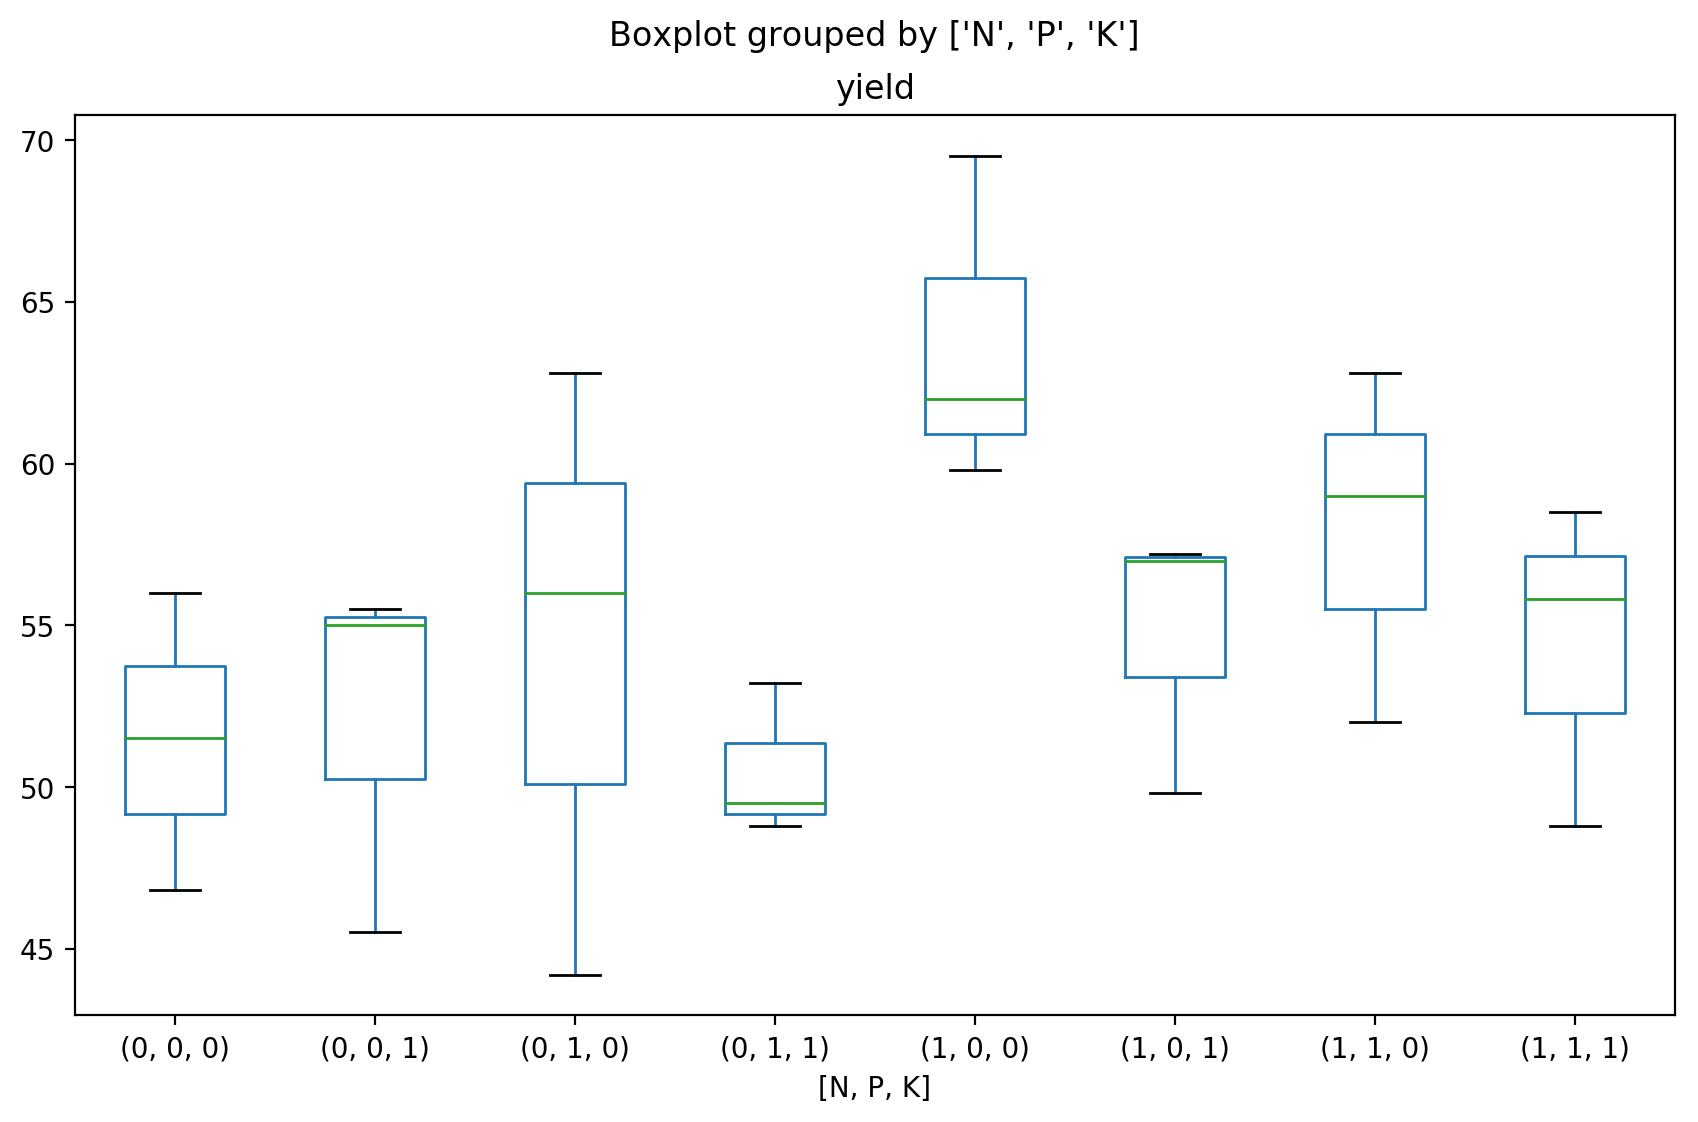

In [93]:
npk = data("npk")
npk.boxplot(['yield'], by=['N','P','K'], grid=False)
plt.show()

Alone, it seems that nitrogen is the most effective.  It's shortest was still above the median growth values for all other single elemnt trials, and exceeded the growth of the control groups.  Nitrogen, by itself seems to be the optimal chemical.  The other two, while on average increased the growth, also had a rather large chance of decreasing growth, especially if not combined with nitrogen.  The worst seems to be potassium and phosphate without nitrogen, as you get a higher chance of one of them stunting the growth without any nitrogen to counteract the effects.

- `"swiss"`,standardized fertility measures and socio-economic indicators for French-speaking provinces of Switzerland at about 1888.
    1. What is the relationship in the data between fertility rates and infant mortality?
    2. How are provinces that are predominantly Catholic different from non-Catholic provinces, if at all?
    3. What factors in the data are the most important for predicting fertility?

In [105]:
swiss = data("swiss")
swiss.pivot_table(values=["Fertility","Infant.Mortality"], index=swiss.index, fill_value="-")

,Fertility,Infant.Mortality
Aigle,64.1,16.5
Aubonne,66.9,19.1
Avenches,68.9,22.7
Boudry,70.4,20.3
Broye,83.8,23.6
Conthey,75.5,15.1
Cossonay,61.7,18.7
Courtelary,80.2,22.2
Delemont,83.1,22.2
Echallens,68.3,21.2


It doesn't seem like there is a correlation between fertility and infant mortality rate.  While it is true that all of the provinces with a relatively high infant mortality rate also have a large fertility number, there are a few rather high fertility numbers with low infant mortality rates (namely Sierre).

In [104]:
catholic = pd.cut(swiss["Catholic"], [0,10,20,30,40,50,60,70,80,90,100])
swiss.pivot_table(values=["Catholic","Fertility"], index=swiss.index, fill_value="-")

,Catholic,Fertility
Aigle,8.52,64.1
Aubonne,2.27,66.9
Avenches,4.43,68.9
Boudry,5.62,70.4
Broye,92.85,83.8
Conthey,99.71,75.5
Cossonay,2.82,61.7
Courtelary,9.96,80.2
Delemont,84.84,83.1
Echallens,24.20,68.3


While on average the more Catholic the province the higher the fertility number, there are a few notable exceptions.  For instance, Entremont is almost entirely Catholic, but only has a fertility number of 69.3, which is lower than or near a lot of provinces with less than a 10% catholic popluation.  Courtelary, which is at 9.96% catholic has a fertility number of 80.2, which is higher than a lot of majorly catholic areas, such as Martigwy and Monthey.  So while more often than not, a catholic province will have a higher fertility rate than average, there are some notable exceptions to this rule.

- Examine a data set of your choice. Formulate simple questions about the data and hypothesize the answers to those questions. Demonstrate the correctness of incorrectness of each hypothesis. Explain your conclusions.